# Projeto Machine Learning - Predi√ß√£o de Acidentes A√©reos Fatais

## Sum√°rio do Projeto: Predi√ß√£o de Acidentes A√©reos Fatais

### 1. Introdu√ß√£o e Objetivos
#### 1.1. Contexto do Problema
#### 1.2. Objetivos da An√°lise
- An√°lise Explorat√≥ria
- Engenharia de Features
- Modelagem Preditiva
- Valida√ß√£o
#### 1.3. Dicion√°rio de Vari√°veis

### 2. Configura√ß√£o do Ambiente

### 3. Carga e An√°lise Inicial dos Dados

### 4. Limpeza e Pr√©-Processamento dos Dados
#### 4.1. Remo√ß√£o de Duplicatas
#### 4.2. Tratamento de Tipos de Dados
#### 4.3. Tratamento de Valores Ausentes (Nulos)
- Preenchimento com mediana (num√©ricos)
- Preenchimento com moda (categ√≥ricos)
- Remo√ß√£o de linhas cr√≠ticas

### 5. An√°lise Explorat√≥ria de Dados (EDA)
#### 5.1. Distribui√ß√£o Geogr√°fica dos Acidentes
#### 5.2 Estados com mais acidentes fatais
#### 5.3 Tend√™ncia da Taxa de Fatalidade

### 6. Engenharia e Sele√ß√£o de Features
#### 6.1. Cria√ß√£o de Features Temporais
#### 6.2. Separa√ß√£o de Features Num√©ricas e Categ√≥ricas
#### 6.3. Prepara√ß√£o dos Dados para Modelagem

### 7. Modelagem
#### 7.1. Divis√£o Treino/Teste
#### 7.2. Encoding e Normaliza√ß√£o
#### 7.3. Balanceamento com SMOTE
#### 7.4. Treinamento dos Modelos
- Modelo Baseline (Dummy)
- Regress√£o Log√≠stica
- √Årvore de Decis√£o

### 8. Valida√ß√£o e Compara√ß√£o dos Modelos
#### 8.1. M√©tricas de Performance
#### 8.2. Matrizes de Confus√£o
#### 8.3. Curva ROC e AUC

### 9. Otimiza√ß√£o e Avalia√ß√£o Final
#### 9.1. An√°lise de Threshold
#### 9.2. Visualiza√ß√£o do Impacto do Threshold
#### 9.3. Compara√ß√£o Final dos Modelos
#### 9.4. An√°lise Explorat√≥ria - Distribui√ß√£o Geogr√°fica
#### 9.5. An√°lise Explorat√≥ria - Padr√µes Temporais
#### 9.6. Compara√ß√£o Visual dos Modelos
#### 9.7. Import√¢ncia das Features

### 10. Conclus√µes e Pr√≥ximos Passos

---

## Alunos:
- **Eduardo**


##### Link do projeto no GitHub: https://github.com/vtQuadros/Trabalho-Machine-Learning


---

## 1. Introdu√ß√£o e Objetivos

### 1.1 Contexto do Problema

A seguran√ßa a√©rea √© uma preocupa√ß√£o fundamental no setor de avia√ß√£o. Identificar padr√µes que levam a acidentes fatais pode ajudar autoridades, companhias a√©reas e √≥rg√£os reguladores a tomar medidas preventivas e salvar vidas.

Este projeto foca em analisar dados hist√≥ricos de acidentes a√©reos no Brasil (CENIPA) para construir um modelo preditivo capaz de determinar se um acidente ser√° fatal ou n√£o-fatal com base em caracter√≠sticas do voo, aeronave e condi√ß√µes do acidente.

### 1.2 Objetivos da An√°lise

- **1.** **An√°lise Explorat√≥ria**: Entender os padr√µes de acidentes a√©reos, identificando distribui√ß√µes geogr√°ficas, temporais e caracter√≠sticas das aeronaves envolvidas.
- **2.** **Engenharia de Features**: Criar vari√°veis que ajudem a identificar o risco de fatalidade, incluindo features temporais e categ√≥ricas.
- **3.** **Modelagem Preditiva**: Treinar e avaliar diferentes modelos de Machine Learning (Baseline, Regress√£o Log√≠stica e √Årvore de Decis√£o) para prever a probabilidade de um acidente ser fatal.
- **4.** **Valida√ß√£o**: Avaliar os modelos usando m√∫ltiplas m√©tricas (Acur√°cia, Precis√£o, Recall, F1-Score, AUC-ROC) e otimizar o threshold de decis√£o.

### 1.3 Dicion√°rio de Vari√°veis

O conjunto de dados cont√©m informa√ß√µes sobre acidentes a√©reos no Brasil. As principais vari√°veis incluem:

**Vari√°veis Geogr√°ficas:**
- **latitude/longitude**: Coordenadas do local do acidente
- **regiao**: Regi√£o do Brasil (Norte, Sul, Nordeste, etc.)
- **uf**: Unidade Federativa

**Vari√°veis Temporais:**
- **dt_ocorrencia**: Data do acidente
- **hr_ocorrencia**: Hora do acidente
- **ano_ocorrencia**: Ano extra√≠do da data
- **mes_ocorrencia**: M√™s extra√≠do da data

**Caracter√≠sticas da Aeronave:**
- **modelo_aeronave**: Modelo da aeronave
- **nome_fabricante**: Fabricante da aeronave
- **cat_aeronave**: Categoria da aeronave
- **peso_max_decolagem**: Peso m√°ximo de decolagem
- **numero_assentos**: N√∫mero de assentos

**Vari√°veis Operacionais:**
- **fase_operacao**: Fase do voo (decolagem, cruzeiro, pouso, etc.)
- **op_padronizado**: Opera√ß√£o padronizada

**Vari√°vel Target:**
- **les_fatais_trip**: 1 = Fatal, 0 = N√£o Fatal

## 2. Configura√ß√£o do Ambiente

Nesta se√ß√£o, importamos todas as bibliotecas necess√°rias para a an√°lise, pr√©-processamento e modelagem.

In [2]:
# Bibliotecas para manipula√ß√£o e an√°lise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualiza√ß√£o de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning e pr√©-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

# Balanceamento de classes
from imblearn.over_sampling import SMOTE

# Configura√ß√µes de visualiza√ß√£o
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
%matplotlib inline

print("‚úì Bibliotecas importadas com sucesso!")

‚úì Bibliotecas importadas com sucesso!


## 3. Carga e An√°lise Inicial dos Dados

Carregamos os dados de treino e realizamos uma verifica√ß√£o inicial para entender sua estrutura, tipos de dados e a presen√ßa de valores ausentes.

In [3]:
# Carregamento do dataset de treino
df = pd.read_csv("docs/treino.csv")

print(f"‚úì Dados carregados com sucesso!")
print(f"Dimens√µes: {df.shape[0]} linhas x {df.shape[1]} colunas")

‚úì Dados carregados com sucesso!
Dimens√µes: 536 linhas x 14 colunas


In [3]:
# Amostra dos dados
df.head()

op_padronizado dt_ocorrencia hr_ocorrencia  \
0             AEROAGRICOLA CHAPADAO LTDA    21/12/1999           NaN   
1           RONDON AVIACAO AGRICOLA LTDA    06/01/2000           NaN   
2  SAPA SERV. AEREO DE PROTECAO AGRICOLA    22/02/2000           NaN   
3             AERO AGRICOLA CAICARA LTDA    10/05/2000           NaN   
4          AVIACAO AGRICOLA RECREIO LTDA    09/11/2000           NaN   

              uf        regiao latitude longitude cat_aeronave fase_operacao  \
0             SP       Sudeste      NaN       NaN          S05           NaN   
1             MT  Centro-Oeste      NaN       NaN          S05           NaN   
2             RS           Sul      NaN       NaN          S05           NaN   
3             SP       Sudeste      NaN       NaN          S05           NaN   
4  Indeterminado           NaN      NaN       NaN          TPP           NaN   

  modelo_aeronave  peso_max_decolagem  numero_assentos    nome_fabricante  \
0       PA-25-235              1315.0              1.0     PIPER AIRCRAFT   
1         EMB-201              1800.0              1.0              NEIVA   
2           A188B              1497.0              1.0    CESSNA AIRCRAFT   
3       PA-25-260              1315.0              1.0     PIPER AIRCRAFT   
4           369HS              1157.0              5.0  HUGHES HELICOPTER   

   les_fatais_trip  
0                0  
1                0  
2                0  
3                0  
4                0

An√°lise Inicial:
- O dataset possui m√∫ltiplas linhas e colunas com informa√ß√µes sobre acidentes a√©reos
- H√° colunas geogr√°ficas (latitude, longitude, regiao, uf)
- Colunas temporais (dt_ocorrencia, hr_ocorrencia)
- Caracter√≠sticas das aeronaves (modelo, fabricante, peso, assentos)
- Vari√°vel target: les_fatais_trip (0 = N√£o Fatal, 1 = Fatal)
- Presen√ßa de valores nulos que precisar√£o de tratamento

In [ ]:
# Verificando a estrutura e os tipos de dados do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   op_padronizado      534 non-null    object 
 1   dt_ocorrencia       536 non-null    object 
 2   hr_ocorrencia       365 non-null    object 
 3   uf                  536 non-null    object 
 4   regiao              473 non-null    object 
 5   latitude            382 non-null    object 
 6   longitude           382 non-null    object 
 7   cat_aeronave        536 non-null    object 
 8   fase_operacao       393 non-null    object 
 9   modelo_aeronave     533 non-null    object 
 10  peso_max_decolagem  534 non-null    float64
 11  numero_assentos     534 non-null    float64
 12  nome_fabricante     533 non-null    object 
 13  les_fatais_trip     536 non-null    int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 58.8+ KB


## 4. Limpeza e Pr√©-Processamento dos Dados

Esta etapa √© crucial para garantir a qualidade dos dados que alimentar√£o o modelo.

### 4.1 Remo√ß√£o de Duplicatas

Removemos registros duplicados que podem distorcer a an√°lise.

In [6]:
# Verificando informa√ß√µes antes da remo√ß√£o
print("Antes da remo√ß√£o de duplicatas:")
df.info()

Antes da remo√ß√£o de duplicatas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   op_padronizado      508 non-null    object 
 1   dt_ocorrencia       510 non-null    object 
 2   hr_ocorrencia       340 non-null    object 
 3   uf                  510 non-null    object 
 4   regiao              447 non-null    object 
 5   latitude            358 non-null    object 
 6   longitude           358 non-null    object 
 7   cat_aeronave        510 non-null    object 
 8   fase_operacao       367 non-null    object 
 9   modelo_aeronave     507 non-null    object 
 10  peso_max_decolagem  508 non-null    float64
 11  numero_assentos     508 non-null    float64
 12  nome_fabricante     507 non-null    object 
 13  les_fatais_trip     510 non-null    int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 55.9+ KB


In [7]:
# Removendo duplicatas
linhas_antes = len(df)
df = df.drop_duplicates().reset_index(drop=True)
linhas_depois = len(df)

print(f"Linhas antes: {linhas_antes}")
print(f"Linhas depois: {linhas_depois}")
print(f"‚úì Duplicatas removidas: {linhas_antes - linhas_depois}")

Linhas antes: 510
Linhas depois: 510
‚úì Duplicatas removidas: 0


### 4.2 Tratamento de Tipos de Dados

Convertemos colunas para os tipos apropriados (datas, num√©ricos, etc.).

In [8]:
# Converter latitude e longitude para float
df['latitude'] = df['latitude'].astype(str).str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].astype(str).str.replace(',', '.').astype(float)

# Converter data
df['dt_ocorrencia'] = pd.to_datetime(df['dt_ocorrencia'], format='%d/%m/%Y', errors='coerce')

print("Convers√µes realizadas!")
df.info()

Convers√µes realizadas!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   op_padronizado      508 non-null    object        
 1   dt_ocorrencia       510 non-null    datetime64[ns]
 2   hr_ocorrencia       340 non-null    object        
 3   uf                  510 non-null    object        
 4   regiao              447 non-null    object        
 5   latitude            358 non-null    float64       
 6   longitude           358 non-null    float64       
 7   cat_aeronave        510 non-null    object        
 8   fase_operacao       367 non-null    object        
 9   modelo_aeronave     507 non-null    object        
 10  peso_max_decolagem  508 non-null    float64       
 11  numero_assentos     508 non-null    float64       
 12  nome_fabricante     507 non-null    object        
 13  les_fatais_trip     510 no

In [9]:
# Verificar valores nulos
print(df.isnull().sum())

op_padronizado          2
dt_ocorrencia           0
hr_ocorrencia         170
uf                      0
regiao                 63
latitude              152
longitude             152
cat_aeronave            0
fase_operacao         143
modelo_aeronave         3
peso_max_decolagem      2
numero_assentos         2
nome_fabricante         3
les_fatais_trip         0
dtype: int64


### 4.3 Tratamento de Valores Ausentes (Nulos)

- **Preenchimento com mediana**: Para colunas num√©ricas
- **Preenchimento com moda**: Para colunas categ√≥ricas
- **Remo√ß√£o de linhas**: Para dados essenciais ausentes

In [10]:
# Preencher valores ausentes - num√©ricos com mediana
df['peso_max_decolagem'].fillna(df['peso_max_decolagem'].median(), inplace=True)
df['numero_assentos'].fillna(df['numero_assentos'].median(), inplace=True)

# Preencher valores ausentes - categ√≥ricos com moda
df['op_padronizado'].fillna(df['op_padronizado'].mode()[0], inplace=True)
df['hr_ocorrencia'].fillna(df['hr_ocorrencia'].mode()[0], inplace=True)
df['regiao'].fillna(df['regiao'].mode()[0], inplace=True)
df['fase_operacao'].fillna(df['fase_operacao'].mode()[0], inplace=True)
df['modelo_aeronave'].fillna(df['modelo_aeronave'].mode()[0], inplace=True)
df['nome_fabricante'].fillna(df['nome_fabricante'].mode()[0], inplace=True)

# Remover linhas com dados essenciais ausentes
df.dropna(subset=['dt_ocorrencia', 'latitude', 'longitude'], inplace=True)

print("Tratamento de valores ausentes conclu√≠do!")
print(f"Total de linhas ap√≥s tratamento: {len(df)}")
print("\nValores nulos restantes:")
print(df.isnull().sum())

Tratamento de valores ausentes conclu√≠do!
Total de linhas ap√≥s tratamento: 358

Valores nulos restantes:
op_padronizado        0
dt_ocorrencia         0
hr_ocorrencia         0
uf                    0
regiao                0
latitude              0
longitude             0
cat_aeronave          0
fase_operacao         0
modelo_aeronave       0
peso_max_decolagem    0
numero_assentos       0
nome_fabricante       0
les_fatais_trip       0
dtype: int64


In [11]:
# Criar novas colunas de ano e m√™s
df['ano_ocorrencia'] = df['dt_ocorrencia'].dt.year
df['mes_ocorrencia'] = df['dt_ocorrencia'].dt.month

print("Novas colunas criadas!")
df[['dt_ocorrencia', 'ano_ocorrencia', 'mes_ocorrencia']].head()

Novas colunas criadas!


dt_ocorrencia  ano_ocorrencia  mes_ocorrencia
63     2008-03-23            2008               3
66     2008-04-02            2008               4
103    2010-04-15            2010               4
110    2010-11-16            2010              11
120    2011-01-06            2011               1

In [12]:
# Tratamento dos valores (NaN)

print("\n--- Contagem de valores nulos ANTES do tratamento ---")


# Lista de colunas num√©ricas para imputar com a mediana
colunas_numericas_nan = ['peso_max_decolagem', 'numero_assentos']
for col in colunas_numericas_nan:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)
    print(f"Valores nulos em '{col}' preenchidos com a mediana: {mediana}")

print("-" * 20)

# Lista de colunas categ√≥ricas para imputar com a moda
colunas_categoricas_nan = ['op_padronizado', 'hr_ocorrencia', 'regiao', 'fase_operacao', 'modelo_aeronave', 'nome_fabricante']
for col in colunas_categoricas_nan:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda)
    print(f"Valores nulos em '{col}' preenchidos com a moda: '{moda}'")

print("-" * 20)

# Removendo linhas onde dados essenciais ainda s√£o nulos
print("Removendo linhas onde 'dt_ocorrencia', 'latitude' ou 'longitude' s√£o nulos...")
df.dropna(subset=['dt_ocorrencia', 'latitude', 'longitude'], inplace=True)

print("\n--- Contagem de valores nulos DEPOIS do tratamento ---")
print(df.isnull().sum())


--- Contagem de valores nulos ANTES do tratamento ---
Valores nulos em 'peso_max_decolagem' preenchidos com a mediana: 1800.0
Valores nulos em 'numero_assentos' preenchidos com a mediana: 1.0
--------------------
Valores nulos em 'op_padronizado' preenchidos com a moda: 'CEAL AVIACAO AGRICOLA LTDA'
Valores nulos em 'hr_ocorrencia' preenchidos com a moda: '10:30:00'
Valores nulos em 'regiao' preenchidos com a moda: 'Sul'
Valores nulos em 'fase_operacao' preenchidos com a moda: 'Especializada'
Valores nulos em 'modelo_aeronave' preenchidos com a moda: 'EMB-202'
Valores nulos em 'nome_fabricante' preenchidos com a moda: 'NEIVA'
--------------------
Removendo linhas onde 'dt_ocorrencia', 'latitude' ou 'longitude' s√£o nulos...

--- Contagem de valores nulos DEPOIS do tratamento ---
op_padronizado        0
dt_ocorrencia         0
hr_ocorrencia         0
uf                    0
regiao                0
latitude              0
longitude             0
cat_aeronave          0
fase_operacao     

## 5. An√°lise Explorat√≥ria de Dados (EDA)

### 5.1 Sele√ß√£o de Features e Visualiza√ß√£o da Distribui√ß√£o da Vari√°vel Target

Features selecionadas: 12
Total de registros: 358

Distribui√ß√£o da vari√°vel target:
les_fatais_trip
0    307
1     51
Name: count, dtype: int64


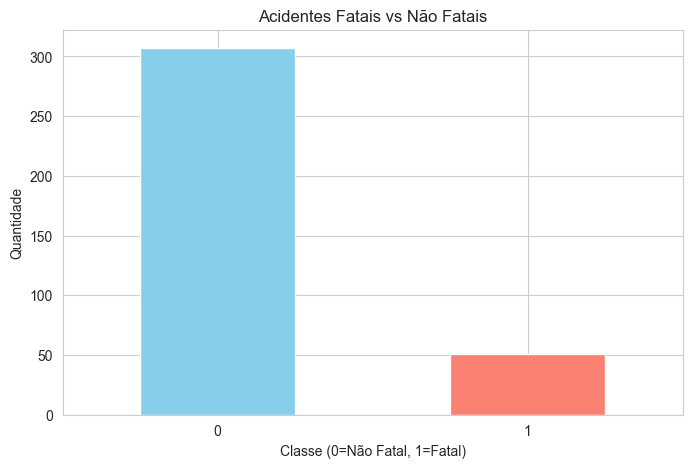

In [13]:
# Selecionar features e target
features = ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos',
            'fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 
            'nome_fabricante', 'ano_ocorrencia', 'mes_ocorrencia']

X = df[features]
y = df['les_fatais_trip']

print(f"Features selecionadas: {X.shape[1]}")
print(f"Total de registros: {X.shape[0]}")

# Verificar balanceamento
print("\nDistribui√ß√£o da vari√°vel target:")
print(y.value_counts())

# Visualizar balanceamento
plt.figure(figsize=(8, 5))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Acidentes Fatais vs N√£o Fatais')
plt.xlabel('Classe (0=N√£o Fatal, 1=Fatal)')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

### 5.2 Estados com mais acidentes fatais

Gerando Gr√°fico: Top 5 UFs com mais Acidentes FATAIS...


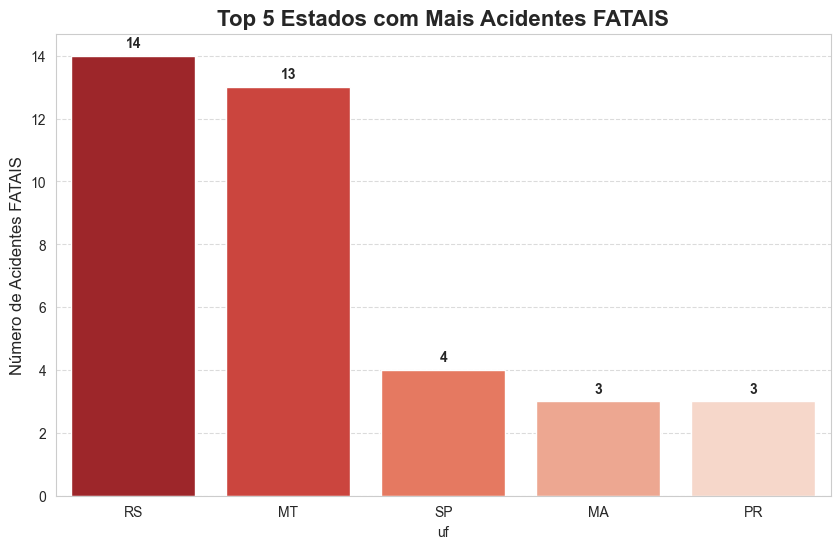

In [ ]:
print("Gerando Gr√°fico: Top 5 UFs com mais Acidentes FATAIS...")

# 1. Filtrar o DataFrame para incluir apenas acidentes fatais
# A coluna 'les_fatais_trip' == 1 indica um acidente fatal
df_fatais = df[df['les_fatais_trip'] == 1]

# 2. Contar as ocorr√™ncias por UF (Estado) e pegar as 5 maiores
top_5_ufs_fatais = df_fatais['uf'].value_counts().head(5)

# 3. Criar o gr√°fico de barras
plt.figure(figsize=(10, 6))
barplot_fatais = sns.barplot(
    x=top_5_ufs_fatais.index, 
    y=top_5_ufs_fatais.values, 
    palette='Reds_r',  # Usando uma paleta de vermelhos para destacar "fatais"
    order=top_5_ufs_fatais.index
)

# 4. Adicionar T√≠tulos e R√≥tulos
plt.title('Top 5 Estados com Mais Acidentes FATAIS', fontsize=16, fontweight='bold')
plt.xlabel('Estado', fontsize=12)
plt.ylabel('N√∫mero de Acidentes FATAIS', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Adicionar r√≥tulos de dados (data labels) em cima das barras
for p in barplot_fatais.patches:
    barplot_fatais.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontweight='bold')

# Exibir o gr√°fico
plt.show()



### 5.3 Tend√™ncia da Taxa de Fatalidade

Gerando Gr√°fico: Tend√™ncia da Taxa de Fatalidade...


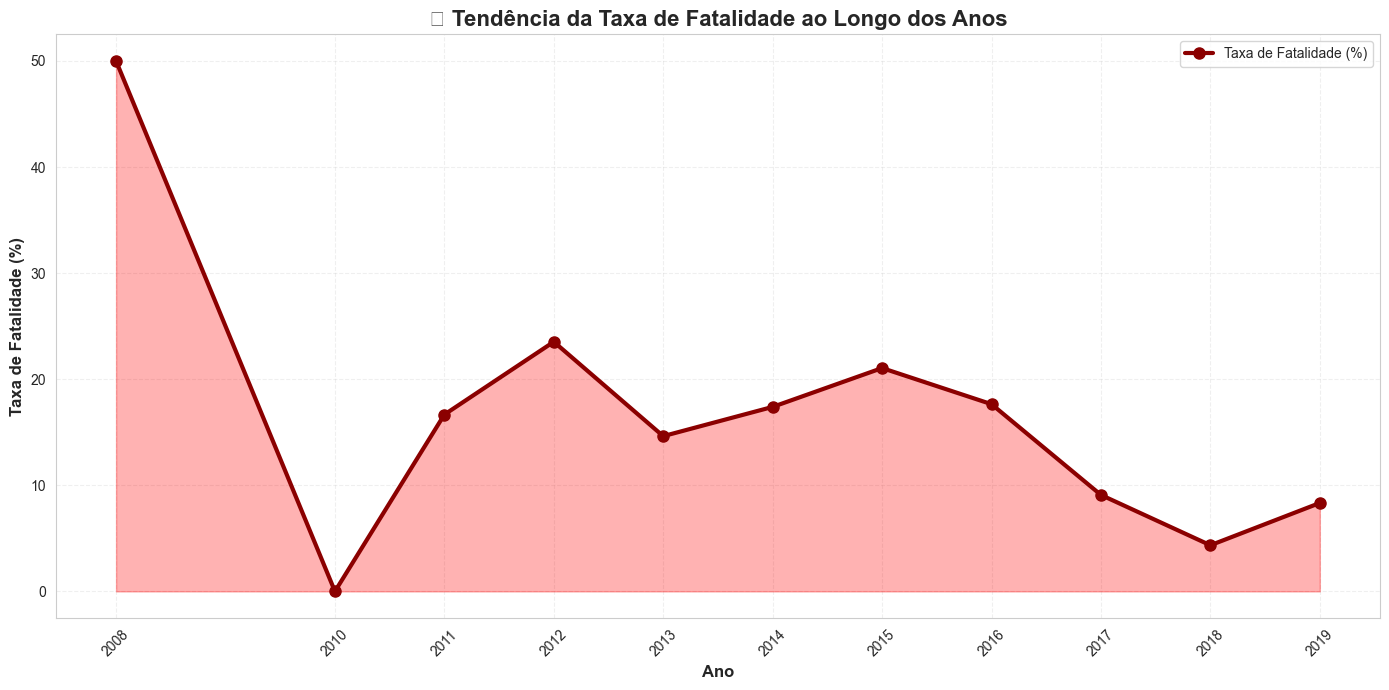

In [21]:

print("Gerando Gr√°fico: Tend√™ncia da Taxa de Fatalidade...")

# 1. Agrupar acidentes fatais (les_fatais_trip == 1) por ano
# Usamos .reindex(df['ano_ocorrencia'].unique()).fillna(0) para garantir que anos sem acidentes fatais apare√ßam como 0
acidentes_fatais_ano = df[df['les_fatais_trip'] == 1].groupby('ano_ocorrencia').size()

# 2. Agrupar TODOS os acidentes por ano
acidentes_totais_ano = df.groupby('ano_ocorrencia').size()

# 3. Calcular a taxa de fatalidade (em %) para cada ano
# .fillna(0) √© usado para anos que n√£o tiveram acidentes fatais
taxa_fatalidade = (acidentes_fatais_ano / acidentes_totais_ano * 100).fillna(0)

# 4. Criar o gr√°fico
plt.figure(figsize=(14, 7)) # Tamanho bom para um gr√°fico de linha
ax = plt.gca() # Pega o eixo atual

# 5. Plotar a linha
ax.plot(taxa_fatalidade.index, taxa_fatalidade.values, marker='o', 
        linewidth=3, markersize=8, color='darkred', label='Taxa de Fatalidade (%)')

# 6. Adicionar a √°rea preenchida abaixo da linha (como no seu exemplo)
ax.fill_between(taxa_fatalidade.index, taxa_fatalidade.values, alpha=0.3, color='red')

# 7. Configurar T√≠tulos e R√≥tulos
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Taxa de Fatalidade (%)', fontsize=12, fontweight='bold')
ax.set_title('üìà Tend√™ncia da Taxa de Fatalidade ao Longo dos Anos', 
              fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')


plt.xticks(taxa_fatalidade.index.astype(int), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## 6. Engenharia e Sele√ß√£o de Features

### 6.1 Divis√£o dos Dados (Treino/Teste)

In [ ]:
# Explica√ß√£o do que ta acontecendo aqui: 

#Essa parte ele pega 50% do modelo para previs√£o e tranca 50% para teste, assim o modelo posteriormente vai pegar o restante dos dados 50% e testar se ele vai descobrir se um acidente foi fatal ou n√£o.
# Se ele tiver todas as respostas, ele n√£o vai conseguir prever um acidente "novo", e falhar√° miser√°velmente.

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Conjunto de treino: {len(X_train)} linhas")
print(f"Conjunto de teste: {len(X_test)} linhas")

Conjunto de treino: 250 linhas
Conjunto de teste: 108 linhas


### 6.2 Separa√ß√£o de Features por Tipo

In [ ]:
## Explica√ß√£o do que ta acontecendo aqui:

# O c√≥digo n√£o vai entender as palavras, ent√£o precisa converter pra n√∫meros
# Essa parte s√≥ separa em duas colunas, o restante est√° no 6.3...

# Separar colunas num√©ricas e categ√≥ricas
colunas_numericas = ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 
                     'ano_ocorrencia', 'mes_ocorrencia']
colunas_categoricas = ['fase_operacao', 'cat_aeronave', 'regiao', 'uf', 
                       'modelo_aeronave', 'nome_fabricante']

print("Colunas num√©ricas:", colunas_numericas)
print("Colunas categ√≥ricas:", colunas_categoricas)

Colunas num√©ricas: ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 'ano_ocorrencia', 'mes_ocorrencia']
Colunas categ√≥ricas: ['fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 'nome_fabricante']


### 6.3 Encoding e Normaliza√ß√£o

In [ ]:
# Explica√ß√£o do que ta acontecendo aqui
#Encoding: Converter as colunas categ√≥ricas, que s√£o texto (ex: "Sul", "SP"), em um formato num√©rico (usando pd.get_dummies) que o modelo consiga processar.
#Normaliza√ß√£o: Colocar todas as features num√©ricas na mesma escala (usando StandardScaler) para que nenhuma vari√°vel domine o modelo apenas por ter n√∫meros maiores.


# Codificar vari√°veis categ√≥ricas com get_dummies
X_train_encoded = pd.get_dummies(X_train, columns=colunas_categoricas)
X_test_encoded = pd.get_dummies(X_test, columns=colunas_categoricas)

# Garantir que treino e teste tenham as mesmas colunas
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print(f"Features ap√≥s encoding: {X_train_encoded.shape[1]}")

# Normalizar features num√©ricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print("Pr√©-processamento conclu√≠do!")

Features ap√≥s encoding: 82
Pr√©-processamento conclu√≠do!


## 7. Modelagem

### 7.1 Balanceamento de Classes com SMOTE

Antes do SMOTE:
Classe 0 (N√£o Fatal): 214
Classe 1 (Fatal): 36

Depois do SMOTE:
Classe 0 (N√£o Fatal): 214
Classe 1 (Fatal): 214

Depois do SMOTE:
Classe 0 (N√£o Fatal): 214
Classe 1 (Fatal): 214


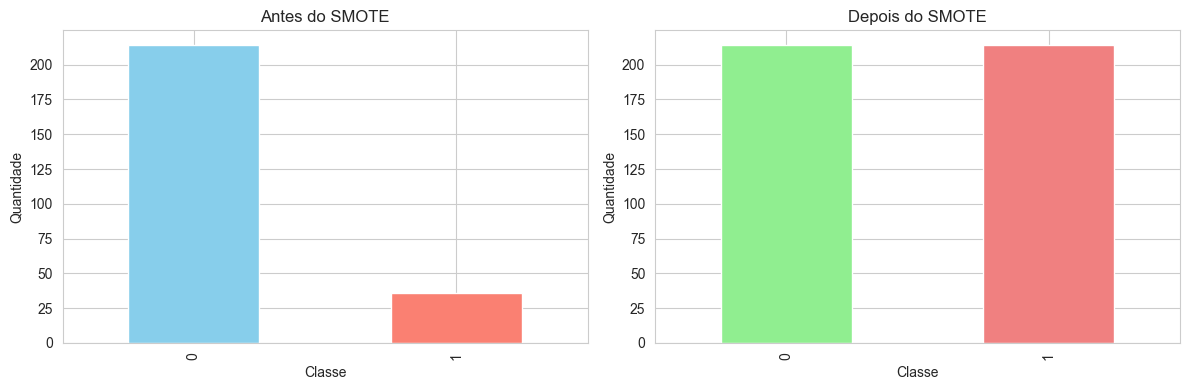

In [ ]:
## Explica√ß√£o do que ta acontecendo aqui

## Os dados de treino est√£o muito desbalanceados, existem muitos acidentes "N√£o fatais" para poucos acidentes "Fatais"

## Oq o SMOTE faz? --- Ele corrige esse desbalancemanento de classes

## Como?? utilizando o SMOTE(random_state=42)), que "cria" novos exemplos sint√©ticos da classe minorit√°ria (acidentes fatais).

# Aplicar SMOTE para balancear as classes
print("Antes do SMOTE:")
print(f"Classe 0 (N√£o Fatal): {sum(y_train == 0)}")
print(f"Classe 1 (Fatal): {sum(y_train == 1)}")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nDepois do SMOTE:")
print(f"Classe 0 (N√£o Fatal): {sum(y_train_balanced == 0)}")
print(f"Classe 1 (Fatal): {sum(y_train_balanced == 1)}")

# Visualizar balanceamento
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

pd.Series(y_train).value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Antes do SMOTE')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Quantidade')

pd.Series(y_train_balanced).value_counts().plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightcoral'])
axes[1].set_title('Depois do SMOTE')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

### 7.2 Treinamento dos Modelos

Treinamos tr√™s modelos para compara√ß√£o:
- **Baseline (Dummy)**: Modelo simples de refer√™ncia
- **Regress√£o Log√≠stica**: Modelo linear com dados balanceados
- **√Årvore de Decis√£o**: Modelo n√£o-linear

In [ ]:
## Aqui ele faz a mesma coisa

# 1. Modelo Baseline (Dummy) - N√£o faz nada, s√≥ prev√™ classes mais frequentes tipo "acidentes fatais" e acusa acur√°cia enganosa
modelo_baseline = DummyClassifier(strategy='most_frequent', random_state=42)
modelo_baseline.fit(X_train_scaled, y_train)

# 2. Regress√£o Log√≠stica com dados balanceados -- Balancemanto principal, com a inclus√£o do Smote
modelo_logistica = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistica.fit(X_train_balanced, y_train_balanced)

# 3. √Årvore de Decis√£o -- Balanceamento original sem os dados do Smote 
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train_scaled, y_train)

print("Modelos treinados com sucesso!")

Modelos treinados com sucesso!


### 7.3 Predi√ß√µes e M√©tricas Iniciais

In [ ]:
## Explica√ß√£o do que ta acontecendo aqui

## Aqui ele est√° fazendo a prova real, ele est√° pegando o modelo treinando e jogando mais dados para ele verificar


# Fazer predi√ß√µes
y_pred_baseline = modelo_baseline.predict(X_test_scaled)
y_pred_logistica = modelo_logistica.predict(X_test_scaled)
y_pred_arvore = modelo_arvore.predict(X_test_scaled)

# Calcular m√©tricas para cada modelo
modelos = ['Baseline', 'Regress√£o Log√≠stica', '√Årvore de Decis√£o']
predicoes = [y_pred_baseline, y_pred_logistica, y_pred_arvore]

print("=" * 60)
print("RESULTADOS DOS MODELOS")
print("=" * 60)

for nome, y_pred in zip(modelos, predicoes):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"\n{nome}:")
    print(f"  Acur√°cia:  {acc:.4f}")
    print(f"  Precis√£o:  {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

print("=" * 60)

RESULTADOS DOS MODELOS

Baseline:
  Acur√°cia:  0.8611
  Precis√£o:  0.0000
  Recall:    0.0000
  F1-Score:  0.0000

Regress√£o Log√≠stica:
  Acur√°cia:  0.7500
  Precis√£o:  0.2500
  Recall:    0.4000
  F1-Score:  0.3077

√Årvore de Decis√£o:
  Acur√°cia:  0.7685
  Precis√£o:  0.1875
  Recall:    0.2000
  F1-Score:  0.1935


## 8. Valida√ß√£o e Compara√ß√£o dos Modelos

### 8.1 Matrizes de Confus√£o

Matriz de Confus√£o - Regress√£o Log√≠stica


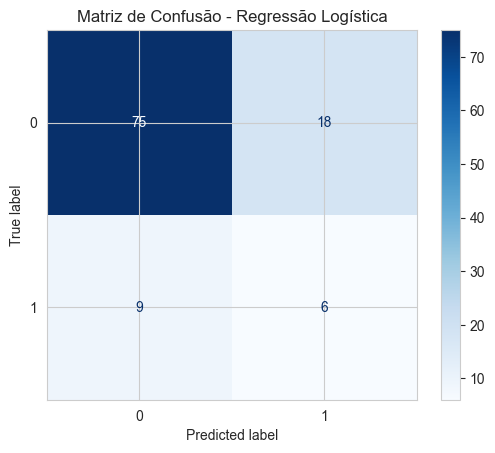


Matriz de Confus√£o - √Årvore de Decis√£o


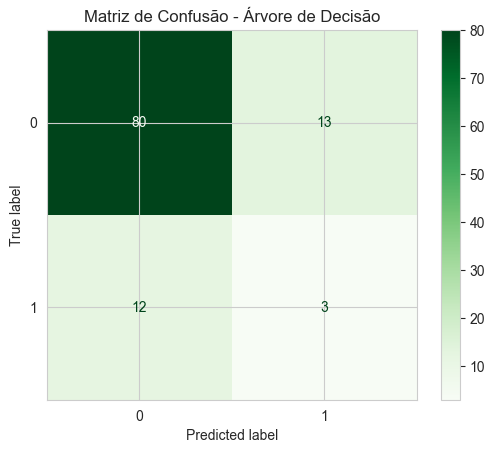

In [19]:
# Matriz de Confus√£o - Regress√£o Log√≠stica
print("Matriz de Confus√£o - Regress√£o Log√≠stica")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistica, cmap='Blues')
plt.title('Matriz de Confus√£o - Regress√£o Log√≠stica')
plt.show()

# Matriz de Confus√£o - √Årvore de Decis√£o
print("\nMatriz de Confus√£o - √Årvore de Decis√£o")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_arvore, cmap='Greens')
plt.title('Matriz de Confus√£o - √Årvore de Decis√£o')
plt.show()

As matrizes de confus√£o mostram os acertos e erros de cada modelo:

### 8.2 Curva ROC e AUC

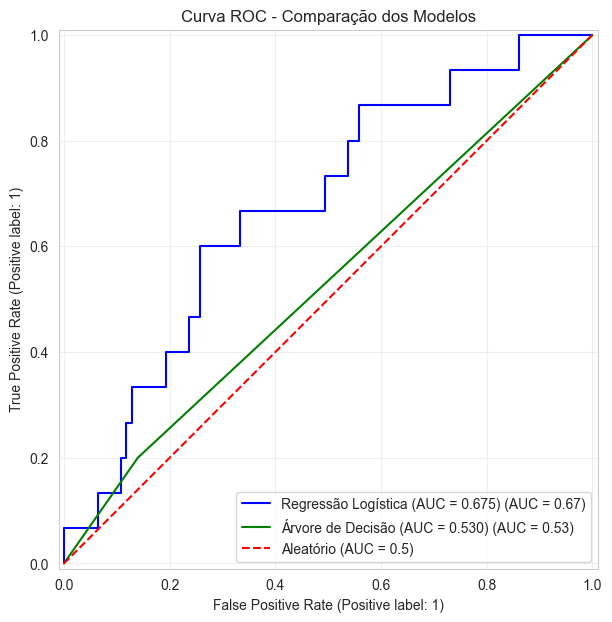

AUC Regress√£o Log√≠stica: 0.675
AUC √Årvore de Decis√£o: 0.530


In [20]:
# Curva ROC
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(10, 7))

# Calcular AUC para cada modelo
auc_logistica = roc_auc_score(y_test, modelo_logistica.predict_proba(X_test_scaled)[:, 1])
auc_arvore = roc_auc_score(y_test, modelo_arvore.predict_proba(X_test_scaled)[:, 1])

# Plotar curvas
RocCurveDisplay.from_predictions(
    y_test, 
    modelo_logistica.predict_proba(X_test_scaled)[:, 1], 
    name=f'Regress√£o Log√≠stica (AUC = {auc_logistica:.3f})', 
    ax=ax,
    color='blue'
)

RocCurveDisplay.from_predictions(
    y_test, 
    modelo_arvore.predict_proba(X_test_scaled)[:, 1], 
    name=f'√Årvore de Decis√£o (AUC = {auc_arvore:.3f})', 
    ax=ax,
    color='green'
)

ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Aleat√≥rio (AUC = 0.5)')
plt.title('Curva ROC - Compara√ß√£o dos Modelos')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"AUC Regress√£o Log√≠stica: {auc_logistica:.3f}")
print(f"AUC √Årvore de Decis√£o: {auc_arvore:.3f}")

## 9. Otimiza√ß√£o e Avalia√ß√£o Final

### 9.1 An√°lise de Threshold (Limiar de Decis√£o)

Por padr√£o, o modelo usa threshold de 0.5 para classificar. Vamos testar diferentes thresholds para otimizar o F1-Score.

In [21]:
# Obtendo as probabilidades de predi√ß√£o
y_proba = modelo_logistica.predict_proba(X_test_scaled)[:, 1]

print("Testando diferentes thresholds de 0.0 a 1.0...")

# Testando diferentes thresholds
thresholds_results = {
    'threshold': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

for threshold in np.arange(0.0, 1.01, 0.01):
    # Aplicando o threshold customizado
    y_pred_threshold = (y_proba >= threshold).astype(int)
    
    # Calculando as m√©tricas
    acc = accuracy_score(y_test, y_pred_threshold)
    prec = precision_score(y_test, y_pred_threshold, zero_division=0)
    rec = recall_score(y_test, y_pred_threshold, zero_division=0)
    f1 = f1_score(y_test, y_pred_threshold, zero_division=0)
    
    # Armazenando os resultados
    thresholds_results['threshold'].append(threshold)
    thresholds_results['accuracy'].append(acc)
    thresholds_results['precision'].append(prec)
    thresholds_results['recall'].append(rec)
    thresholds_results['f1_score'].append(f1)

# Convertendo para DataFrame
df_thresholds = pd.DataFrame(thresholds_results)

# Encontrando o melhor threshold baseado no F1-Score
melhor_threshold_idx = df_thresholds['f1_score'].idxmax()
melhor_threshold = df_thresholds.loc[melhor_threshold_idx, 'threshold']
melhor_f1 = df_thresholds.loc[melhor_threshold_idx, 'f1_score']

print(f"\nMelhor threshold encontrado: {melhor_threshold:.2f}")
print(f"F1-Score: {melhor_f1:.4f}")
print(f"Accuracy: {df_thresholds.loc[melhor_threshold_idx, 'accuracy']:.4f}")
print(f"Precision: {df_thresholds.loc[melhor_threshold_idx, 'precision']:.4f}")
print(f"Recall: {df_thresholds.loc[melhor_threshold_idx, 'recall']:.4f}")

print(f"\nTop 5 melhores thresholds por F1-Score:")
print(df_thresholds.nlargest(5, 'f1_score')[['threshold', 'f1_score', 'accuracy', 'precision', 'recall']])

Testando diferentes thresholds de 0.0 a 1.0...

Melhor threshold encontrado: 0.26
F1-Score: 0.3673
Accuracy: 0.7130
Precision: 0.2647
Recall: 0.6000

Top 5 melhores thresholds por F1-Score:
    threshold  f1_score  accuracy  precision  recall
26       0.26  0.367347  0.712963   0.264706     0.6
27       0.27  0.367347  0.712963   0.264706     0.6
28       0.28  0.367347  0.712963   0.264706     0.6
29       0.29  0.367347  0.712963   0.264706     0.6
30       0.30  0.367347  0.712963   0.264706     0.6

Melhor threshold encontrado: 0.26
F1-Score: 0.3673
Accuracy: 0.7130
Precision: 0.2647
Recall: 0.6000

Top 5 melhores thresholds por F1-Score:
    threshold  f1_score  accuracy  precision  recall
26       0.26  0.367347  0.712963   0.264706     0.6
27       0.27  0.367347  0.712963   0.264706     0.6
28       0.28  0.367347  0.712963   0.264706     0.6
29       0.29  0.367347  0.712963   0.264706     0.6
30       0.30  0.367347  0.712963   0.264706     0.6


### 9.2 Visualiza√ß√£o do Impacto do Threshold

Vamos visualizar graficamente como o threshold afeta as diferentes m√©tricas.

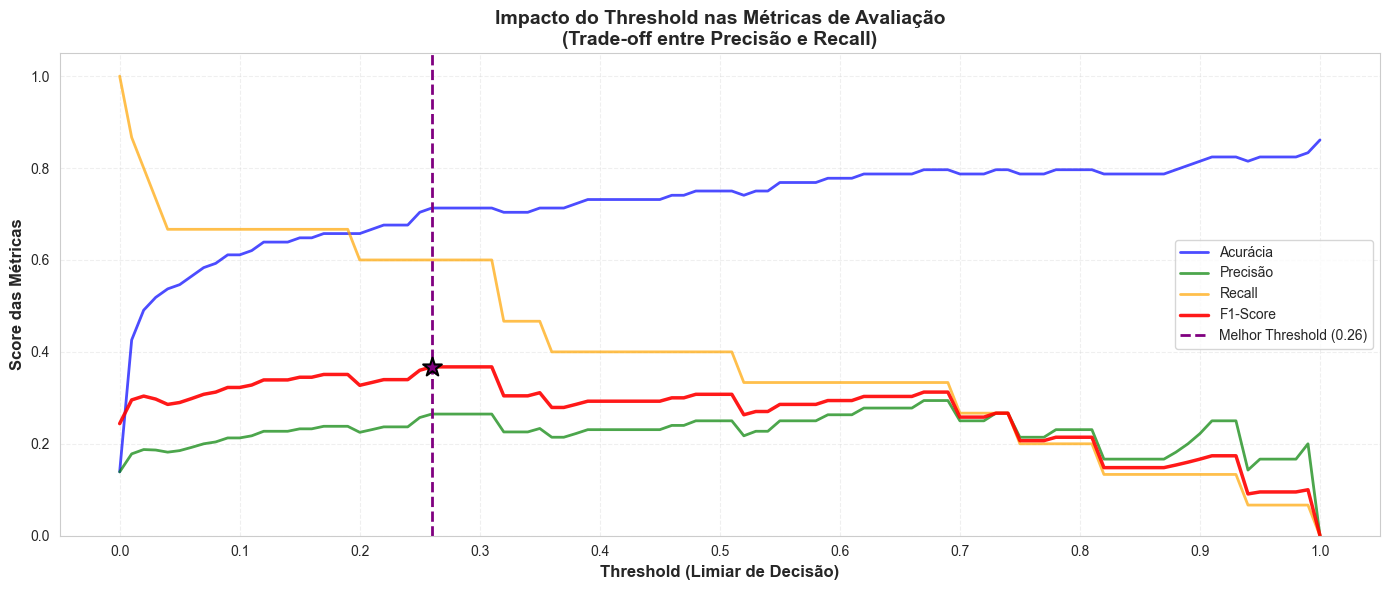


üìñ INTERPRETA√á√ÉO DO GR√ÅFICO:

1. PRECIS√ÉO (linha verde):
   - Aumenta conforme o threshold aumenta
   - Threshold alto = menos falsos positivos = maior precis√£o
   - Use threshold alto quando o custo de falsos positivos √© alto

2. RECALL (linha laranja):
   - Diminui conforme o threshold aumenta
   - Threshold baixo = menos falsos negativos = maior recall
   - Use threshold baixo quando o custo de falsos negativos √© alto

3. F1-SCORE (linha vermelha - MAIS IMPORTANTE):
   - Equilibra Precis√£o e Recall
   - Pico em threshold = 0.26
   - √â o melhor ponto de equil√≠brio entre as duas m√©tricas

4. TRADE-OFF:
   - O gr√°fico mostra claramente o trade-off entre Precis√£o e Recall
   - N√£o podemos maximizar ambos simultaneamente
   - O threshold √≥timo (0.26) balanceia ambos



In [22]:
# Criando o gr√°fico de impacto do threshold
plt.figure(figsize=(14, 6))

# Plotando as curvas de m√©tricas
plt.plot(df_thresholds['threshold'], df_thresholds['accuracy'], 
         label='Acur√°cia', linewidth=2, color='blue', alpha=0.7)
plt.plot(df_thresholds['threshold'], df_thresholds['precision'], 
         label='Precis√£o', linewidth=2, color='green', alpha=0.7)
plt.plot(df_thresholds['threshold'], df_thresholds['recall'], 
         label='Recall', linewidth=2, color='orange', alpha=0.7)
plt.plot(df_thresholds['threshold'], df_thresholds['f1_score'], 
         label='F1-Score', linewidth=2.5, color='red', alpha=0.9)

# Marcando o melhor threshold
plt.axvline(x=melhor_threshold, color='purple', linestyle='--', linewidth=2, 
            label=f'Melhor Threshold ({melhor_threshold:.2f})')
plt.scatter([melhor_threshold], [melhor_f1], color='purple', s=200, zorder=5, 
            marker='*', edgecolors='black', linewidths=1.5)

# Configura√ß√µes do gr√°fico
plt.xlabel('Threshold (Limiar de Decis√£o)', fontsize=12, fontweight='bold')
plt.ylabel('Score das M√©tricas', fontsize=12, fontweight='bold')
plt.title('Impacto do Threshold nas M√©tricas de Avalia√ß√£o\n(Trade-off entre Precis√£o e Recall)', 
          fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylim([0, 1.05])

plt.tight_layout()
plt.show()

# Interpreta√ß√£o dos resultados
print("\nüìñ INTERPRETA√á√ÉO DO GR√ÅFICO:")
print("=" * 70)
print("\n1. PRECIS√ÉO (linha verde):")
print("   - Aumenta conforme o threshold aumenta")
print("   - Threshold alto = menos falsos positivos = maior precis√£o")
print("   - Use threshold alto quando o custo de falsos positivos √© alto")

print("\n2. RECALL (linha laranja):")
print("   - Diminui conforme o threshold aumenta")
print("   - Threshold baixo = menos falsos negativos = maior recall")
print("   - Use threshold baixo quando o custo de falsos negativos √© alto")

print("\n3. F1-SCORE (linha vermelha - MAIS IMPORTANTE):")
print("   - Equilibra Precis√£o e Recall")
print(f"   - Pico em threshold = {melhor_threshold:.2f}")
print("   - √â o melhor ponto de equil√≠brio entre as duas m√©tricas")

print("\n4. TRADE-OFF:")
print("   - O gr√°fico mostra claramente o trade-off entre Precis√£o e Recall")
print("   - N√£o podemos maximizar ambos simultaneamente")
print(f"   - O threshold √≥timo ({melhor_threshold:.2f}) balanceia ambos")

print("\n" + "=" * 70)

### 9.3 Compara√ß√£o Final dos Modelos

COMPARA√á√ÉO DE M√âTRICAS DOS MODELOS
                Modelo  Acur√°cia  Precis√£o  Recall  F1-Score
0     Baseline (Dummy)  0.861111  0.000000     0.0  0.000000
1  Regress√£o Log√≠stica  0.712963  0.264706     0.6  0.367347
2    √Årvore de Decis√£o  0.768519  0.187500     0.2  0.193548

MELHOR MODELO: Regress√£o Log√≠stica
F1-Score: 0.3673

Matriz de Confus√£o: Regress√£o Log√≠stica


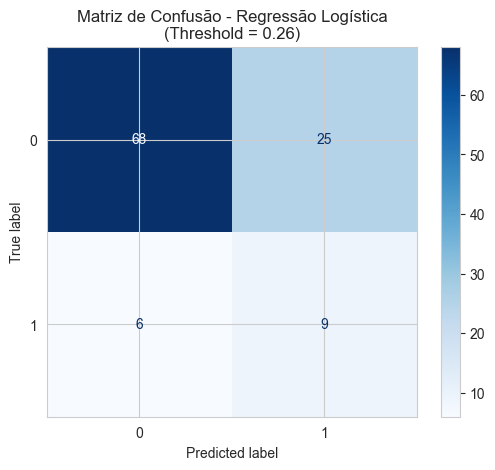


Matriz de Confus√£o: √Årvore de Decis√£o


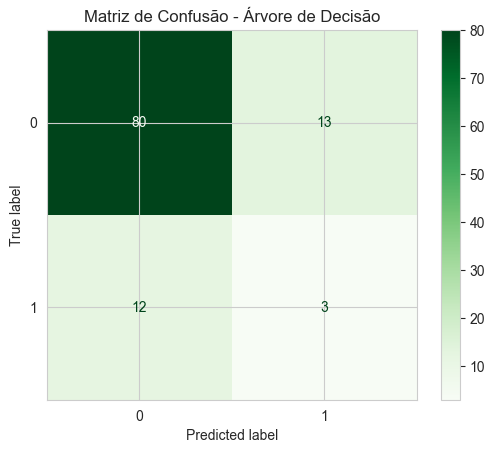

In [23]:
# Aplicando threshold otimizado
y_pred_logistica_threshold = (y_proba >= melhor_threshold).astype(int)

# Comparando m√©tricas dos modelos
metricas = {
    'Modelo': ['Baseline (Dummy)', 'Regress√£o Log√≠stica', '√Årvore de Decis√£o'],
    'Acur√°cia': [
        accuracy_score(y_test, y_pred_baseline), 
        accuracy_score(y_test, y_pred_logistica_threshold),
        accuracy_score(y_test, y_pred_arvore)
    ],
    'Precis√£o': [
        precision_score(y_test, y_pred_baseline, zero_division=0), 
        precision_score(y_test, y_pred_logistica_threshold, zero_division=0),
        precision_score(y_test, y_pred_arvore, zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred_baseline, zero_division=0), 
        recall_score(y_test, y_pred_logistica_threshold, zero_division=0),
        recall_score(y_test, y_pred_arvore, zero_division=0)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_baseline, zero_division=0), 
        f1_score(y_test, y_pred_logistica_threshold, zero_division=0),
        f1_score(y_test, y_pred_arvore, zero_division=0)
    ]
}

df_metricas = pd.DataFrame(metricas)

# Mostrando resultados
print("="*80)
print("COMPARA√á√ÉO DE M√âTRICAS DOS MODELOS")
print("="*80)
print(df_metricas)

# Encontrando o melhor modelo por F1-Score
melhor_modelo_idx = df_metricas['F1-Score'].idxmax()
print(f"\nMELHOR MODELO: {df_metricas.loc[melhor_modelo_idx, 'Modelo']}")
print(f"F1-Score: {df_metricas.loc[melhor_modelo_idx, 'F1-Score']:.4f}")
print("="*80)

# Matriz de Confus√£o - Regress√£o Log√≠stica
print("\nMatriz de Confus√£o: Regress√£o Log√≠stica")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistica_threshold, cmap='Blues')
plt.title(f'Matriz de Confus√£o - Regress√£o Log√≠stica\n(Threshold = {melhor_threshold:.2f})')
plt.show()

# Matriz de Confus√£o - √Årvore de Decis√£o
print("\nMatriz de Confus√£o: √Årvore de Decis√£o")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_arvore, cmap='Greens')
plt.title('Matriz de Confus√£o - √Årvore de Decis√£o')
plt.show()

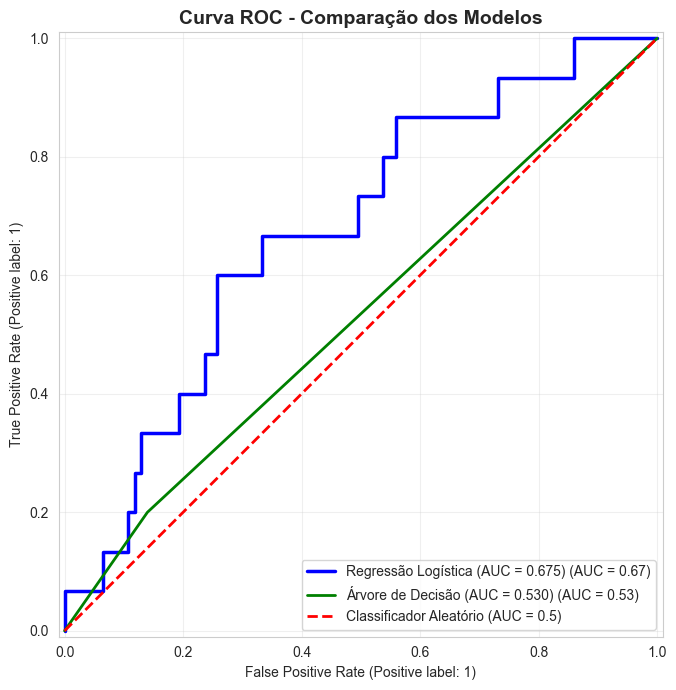


INTERPRETA√á√ÉO DA CURVA ROC:
- AUC pr√≥ximo de 1.0: Modelo excelente
- AUC pr√≥ximo de 0.5: Modelo aleat√≥rio
- Regress√£o Log√≠stica: 0.675
- √Årvore de Decis√£o: 0.530


In [24]:
# Obtendo probabilidades
y_proba_logistica = modelo_logistica.predict_proba(X_test_scaled)[:, 1]
y_proba_arvore = modelo_arvore.predict_proba(X_test_scaled)[:, 1]

# Calculando AUC
auc_logistica = roc_auc_score(y_test, y_proba_logistica)
auc_arvore = roc_auc_score(y_test, y_proba_arvore)

# Plotando as curvas ROC
fig, ax = plt.subplots(figsize=(10, 7))

RocCurveDisplay.from_predictions(
    y_test, 
    y_proba_logistica, 
    name=f'Regress√£o Log√≠stica (AUC = {auc_logistica:.3f})', 
    ax=ax,
    color='blue',
    linewidth=2.5
)

RocCurveDisplay.from_predictions(
    y_test, 
    y_proba_arvore, 
    name=f'√Årvore de Decis√£o (AUC = {auc_arvore:.3f})', 
    ax=ax,
    color='green',
    linewidth=2
)

# Linha de refer√™ncia
ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Classificador Aleat√≥rio (AUC = 0.5)', linewidth=2)

plt.title('Curva ROC - Compara√ß√£o dos Modelos', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nINTERPRETA√á√ÉO DA CURVA ROC:")
print("- AUC pr√≥ximo de 1.0: Modelo excelente")
print("- AUC pr√≥ximo de 0.5: Modelo aleat√≥rio")
print(f"- Regress√£o Log√≠stica: {auc_logistica:.3f}")
print(f"- √Årvore de Decis√£o: {auc_arvore:.3f}")

### 9.4 An√°lise Explorat√≥ria - Distribui√ß√£o Geogr√°fica

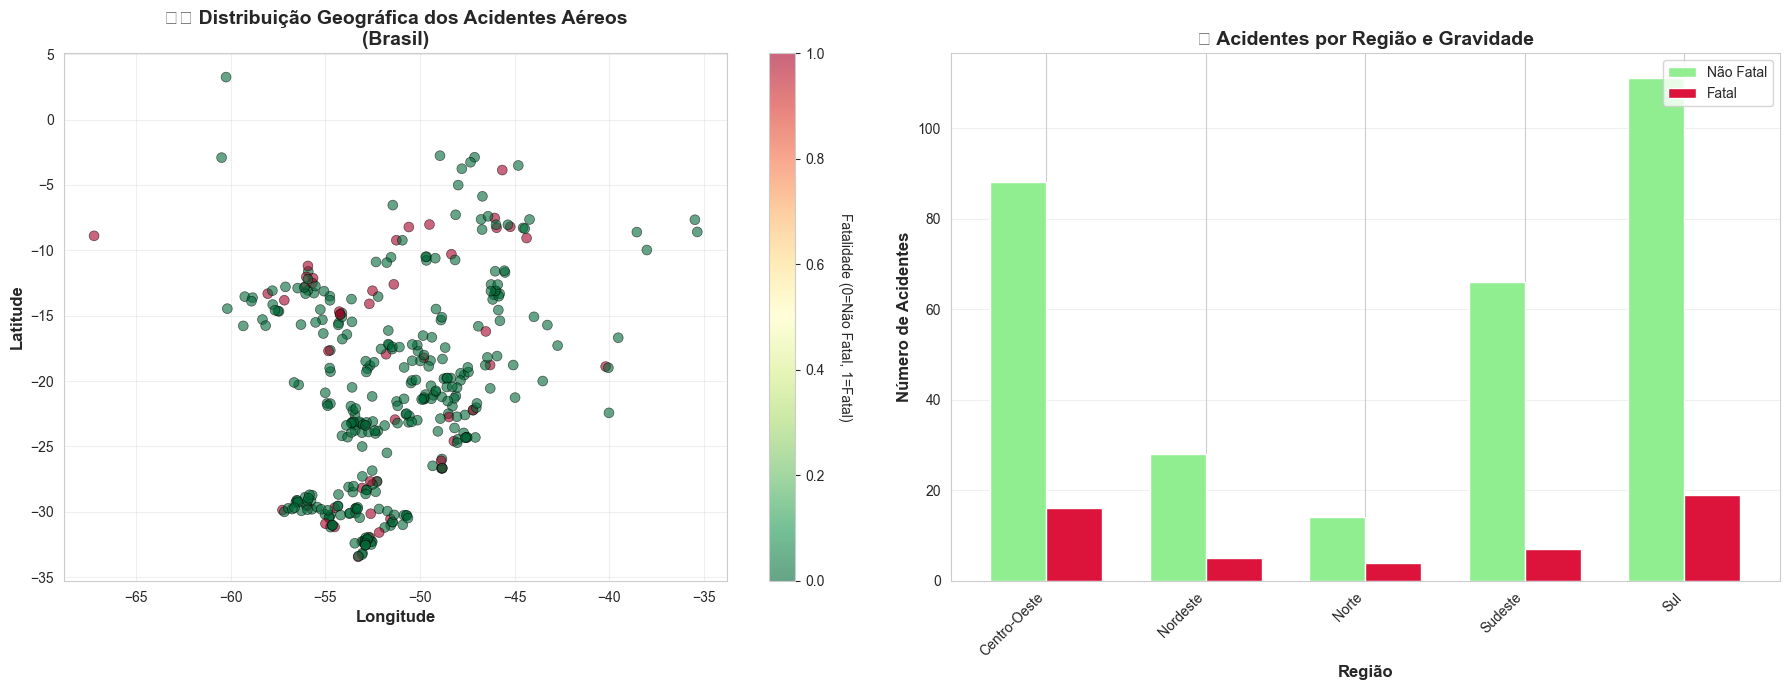


üìä ESTAT√çSTICAS GEOGR√ÅFICAS

üó∫Ô∏è Total de acidentes: 358

üìç Acidentes por regi√£o:
   Sul: 130 acidentes (19 fatais - 14.6%)
   Centro-Oeste: 104 acidentes (16 fatais - 15.4%)
   Sudeste: 73 acidentes (7 fatais - 9.6%)
   Nordeste: 33 acidentes (5 fatais - 15.2%)
   Norte: 18 acidentes (4 fatais - 22.2%)


In [25]:
# Visualiza√ß√£o Geogr√°fica dos Acidentes
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gr√°fico 1: Mapa de dispers√£o de todos os acidentes
scatter1 = axes[0].scatter(
    df['longitude'], 
    df['latitude'], 
    c=df['les_fatais_trip'],
    cmap='RdYlGn_r',  # Vermelho (fatal) para Verde (n√£o-fatal)
    alpha=0.6,
    s=50,
    edgecolors='black',
    linewidth=0.5
)
axes[0].set_xlabel('Longitude', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Latitude', fontsize=12, fontweight='bold')
axes[0].set_title('üó∫Ô∏è Distribui√ß√£o Geogr√°fica dos Acidentes A√©reos\n(Brasil)', 
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Adicionar legenda
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Fatalidade (0=N√£o Fatal, 1=Fatal)', rotation=270, labelpad=20)

# Gr√°fico 2: Acidentes por Regi√£o
acidentes_por_regiao = df.groupby(['regiao', 'les_fatais_trip']).size().unstack(fill_value=0)
acidentes_por_regiao.plot(kind='bar', ax=axes[1], color=['lightgreen', 'crimson'], width=0.7)
axes[1].set_xlabel('Regi√£o', fontsize=12, fontweight='bold')
axes[1].set_ylabel('N√∫mero de Acidentes', fontsize=12, fontweight='bold')
axes[1].set_title('üìç Acidentes por Regi√£o e Gravidade', fontsize=14, fontweight='bold')
axes[1].legend(['N√£o Fatal', 'Fatal'], loc='upper right')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Estat√≠sticas geogr√°ficas
print("\nüìä ESTAT√çSTICAS GEOGR√ÅFICAS")
print("="*70)
print(f"\nüó∫Ô∏è Total de acidentes: {len(df)}")
print(f"\nüìç Acidentes por regi√£o:")
for regiao in df['regiao'].value_counts().index:
    total = len(df[df['regiao'] == regiao])
    fatais = len(df[(df['regiao'] == regiao) & (df['les_fatais_trip'] == 1)])
    taxa = (fatais/total)*100 if total > 0 else 0
    print(f"   {regiao}: {total} acidentes ({fatais} fatais - {taxa:.1f}%)")

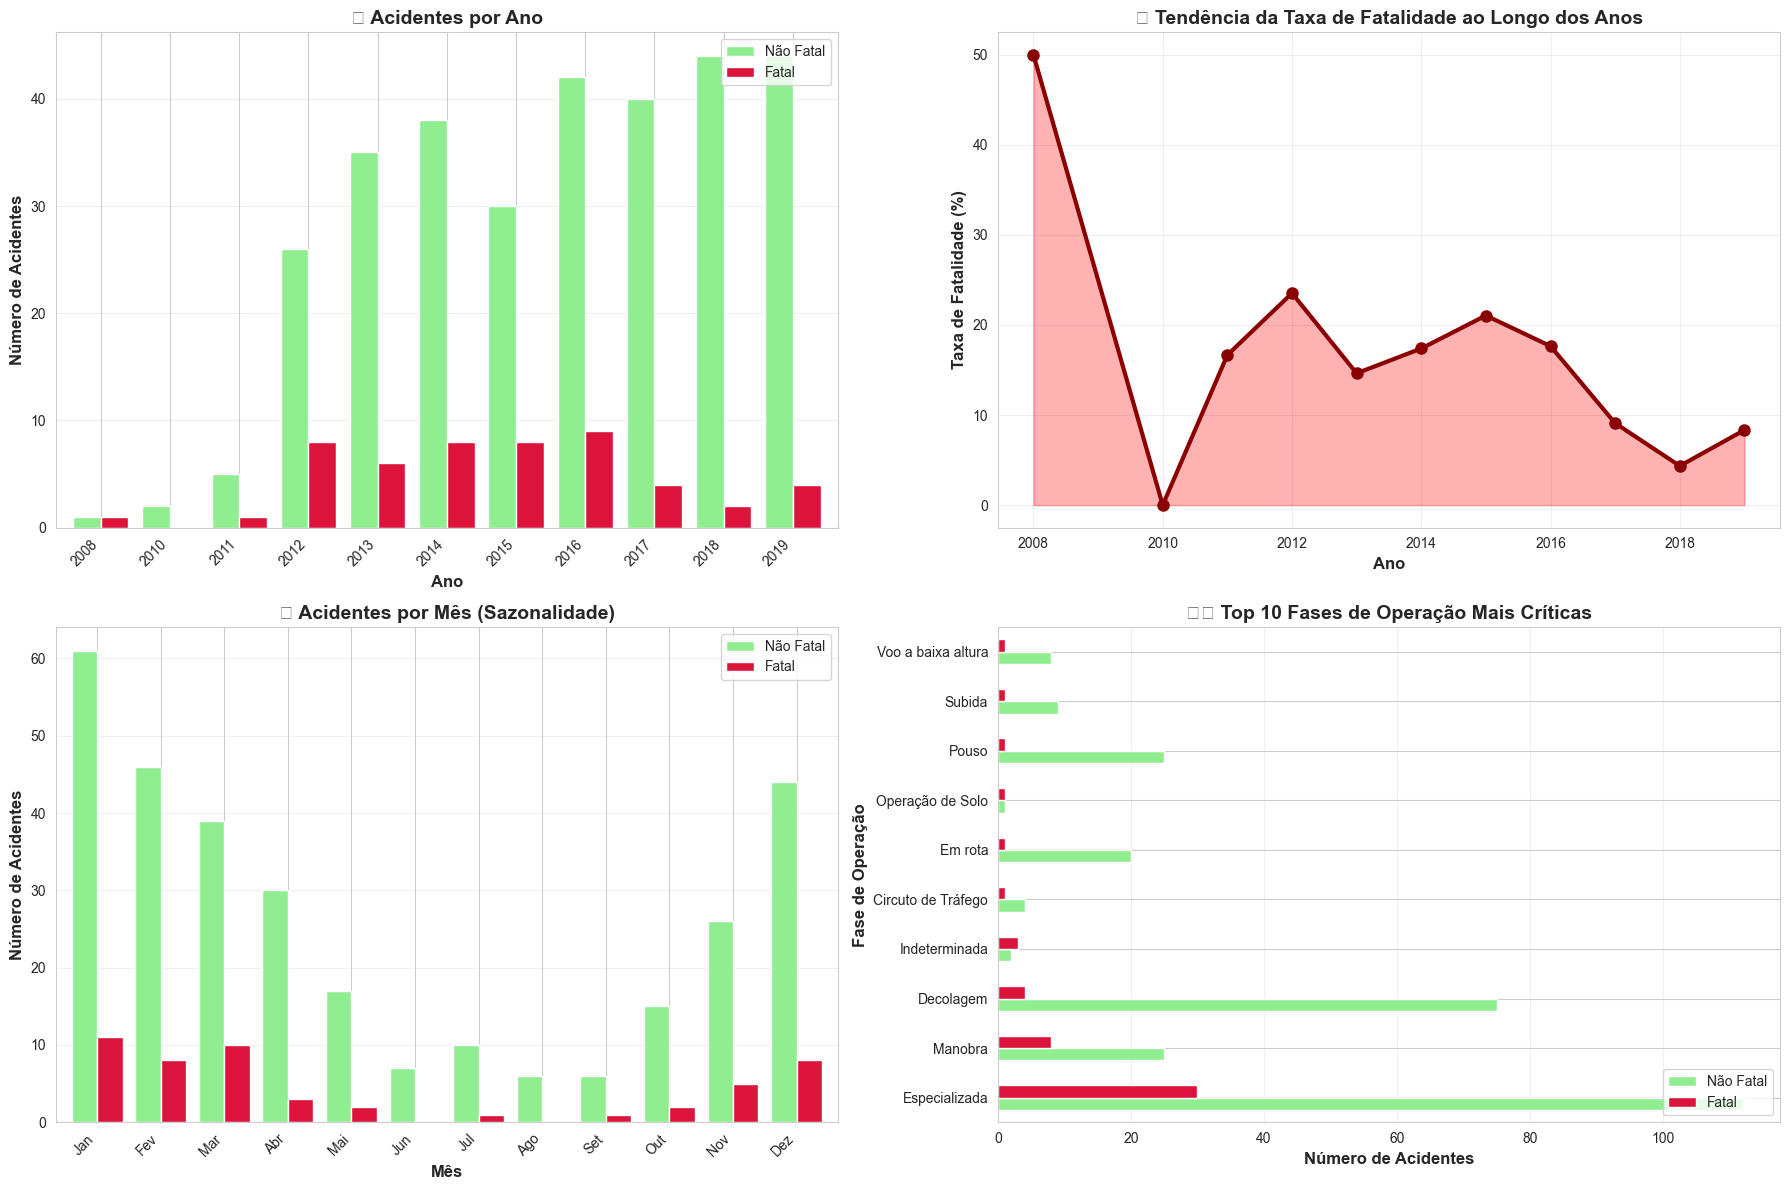


üìä ESTAT√çSTICAS TEMPORAIS

üìÖ Per√≠odo analisado: 2008 - 2019

üìà Taxa m√©dia de fatalidade: 16.61%

üî¥ Ano com maior taxa de fatalidade: 2008 (50.00%)
üü¢ Ano com menor taxa de fatalidade: 2010 (0.00%)

üìÜ M√™s com mais acidentes: Jan
üìÜ M√™s com menos acidentes: Ago


In [26]:
# An√°lise Temporal dos Acidentes
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gr√°fico 1: Acidentes por Ano
acidentes_ano = df.groupby(['ano_ocorrencia', 'les_fatais_trip']).size().unstack(fill_value=0)
acidentes_ano.plot(kind='bar', ax=axes[0, 0], color=['lightgreen', 'crimson'], width=0.8)
axes[0, 0].set_xlabel('Ano', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('N√∫mero de Acidentes', fontsize=12, fontweight='bold')
axes[0, 0].set_title('üìä Acidentes por Ano', fontsize=14, fontweight='bold')
axes[0, 0].legend(['N√£o Fatal', 'Fatal'], loc='upper right')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# Gr√°fico 2: Tend√™ncia de Acidentes Fatais
acidentes_fatais_ano = df[df['les_fatais_trip'] == 1].groupby('ano_ocorrencia').size()
acidentes_totais_ano = df.groupby('ano_ocorrencia').size()
taxa_fatalidade = (acidentes_fatais_ano / acidentes_totais_ano * 100).fillna(0)

axes[0, 1].plot(taxa_fatalidade.index, taxa_fatalidade.values, marker='o', 
                linewidth=3, markersize=8, color='darkred')
axes[0, 1].fill_between(taxa_fatalidade.index, taxa_fatalidade.values, alpha=0.3, color='red')
axes[0, 1].set_xlabel('Ano', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Taxa de Fatalidade (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('üìà Tend√™ncia da Taxa de Fatalidade ao Longo dos Anos', 
                      fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Gr√°fico 3: Acidentes por M√™s
acidentes_mes = df.groupby(['mes_ocorrencia', 'les_fatais_trip']).size().unstack(fill_value=0)
acidentes_mes.plot(kind='bar', ax=axes[1, 0], color=['lightgreen', 'crimson'], width=0.8)
axes[1, 0].set_xlabel('M√™s', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('N√∫mero de Acidentes', fontsize=12, fontweight='bold')
axes[1, 0].set_title('üìÜ Acidentes por M√™s (Sazonalidade)', fontsize=14, fontweight='bold')
axes[1, 0].legend(['N√£o Fatal', 'Fatal'], loc='upper right')
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
axes[1, 0].set_xticklabels(meses, rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# Gr√°fico 4: Acidentes por Fase de Opera√ß√£o
acidentes_fase = df.groupby(['fase_operacao', 'les_fatais_trip']).size().unstack(fill_value=0)
acidentes_fase = acidentes_fase.nlargest(10, 1)  # Top 10 fases com mais fatais
acidentes_fase.plot(kind='barh', ax=axes[1, 1], color=['lightgreen', 'crimson'])
axes[1, 1].set_xlabel('N√∫mero de Acidentes', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Fase de Opera√ß√£o', fontsize=12, fontweight='bold')
axes[1, 1].set_title('‚úàÔ∏è Top 10 Fases de Opera√ß√£o Mais Cr√≠ticas', fontsize=14, fontweight='bold')
axes[1, 1].legend(['N√£o Fatal', 'Fatal'], loc='lower right')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Estat√≠sticas temporais
print("\nüìä ESTAT√çSTICAS TEMPORAIS")
print("="*70)
print(f"\nüìÖ Per√≠odo analisado: {df['ano_ocorrencia'].min()} - {df['ano_ocorrencia'].max()}")
print(f"\nüìà Taxa m√©dia de fatalidade: {taxa_fatalidade.mean():.2f}%")
print(f"\nüî¥ Ano com maior taxa de fatalidade: {taxa_fatalidade.idxmax()} ({taxa_fatalidade.max():.2f}%)")
print(f"üü¢ Ano com menor taxa de fatalidade: {taxa_fatalidade.idxmin()} ({taxa_fatalidade.min():.2f}%)")
print(f"\nüìÜ M√™s com mais acidentes: {meses[acidentes_mes.sum(axis=1).idxmax()-1]}")
print(f"üìÜ M√™s com menos acidentes: {meses[acidentes_mes.sum(axis=1).idxmin()-1]}")

### 9.5 An√°lise Explorat√≥ria - Padr√µes Temporais

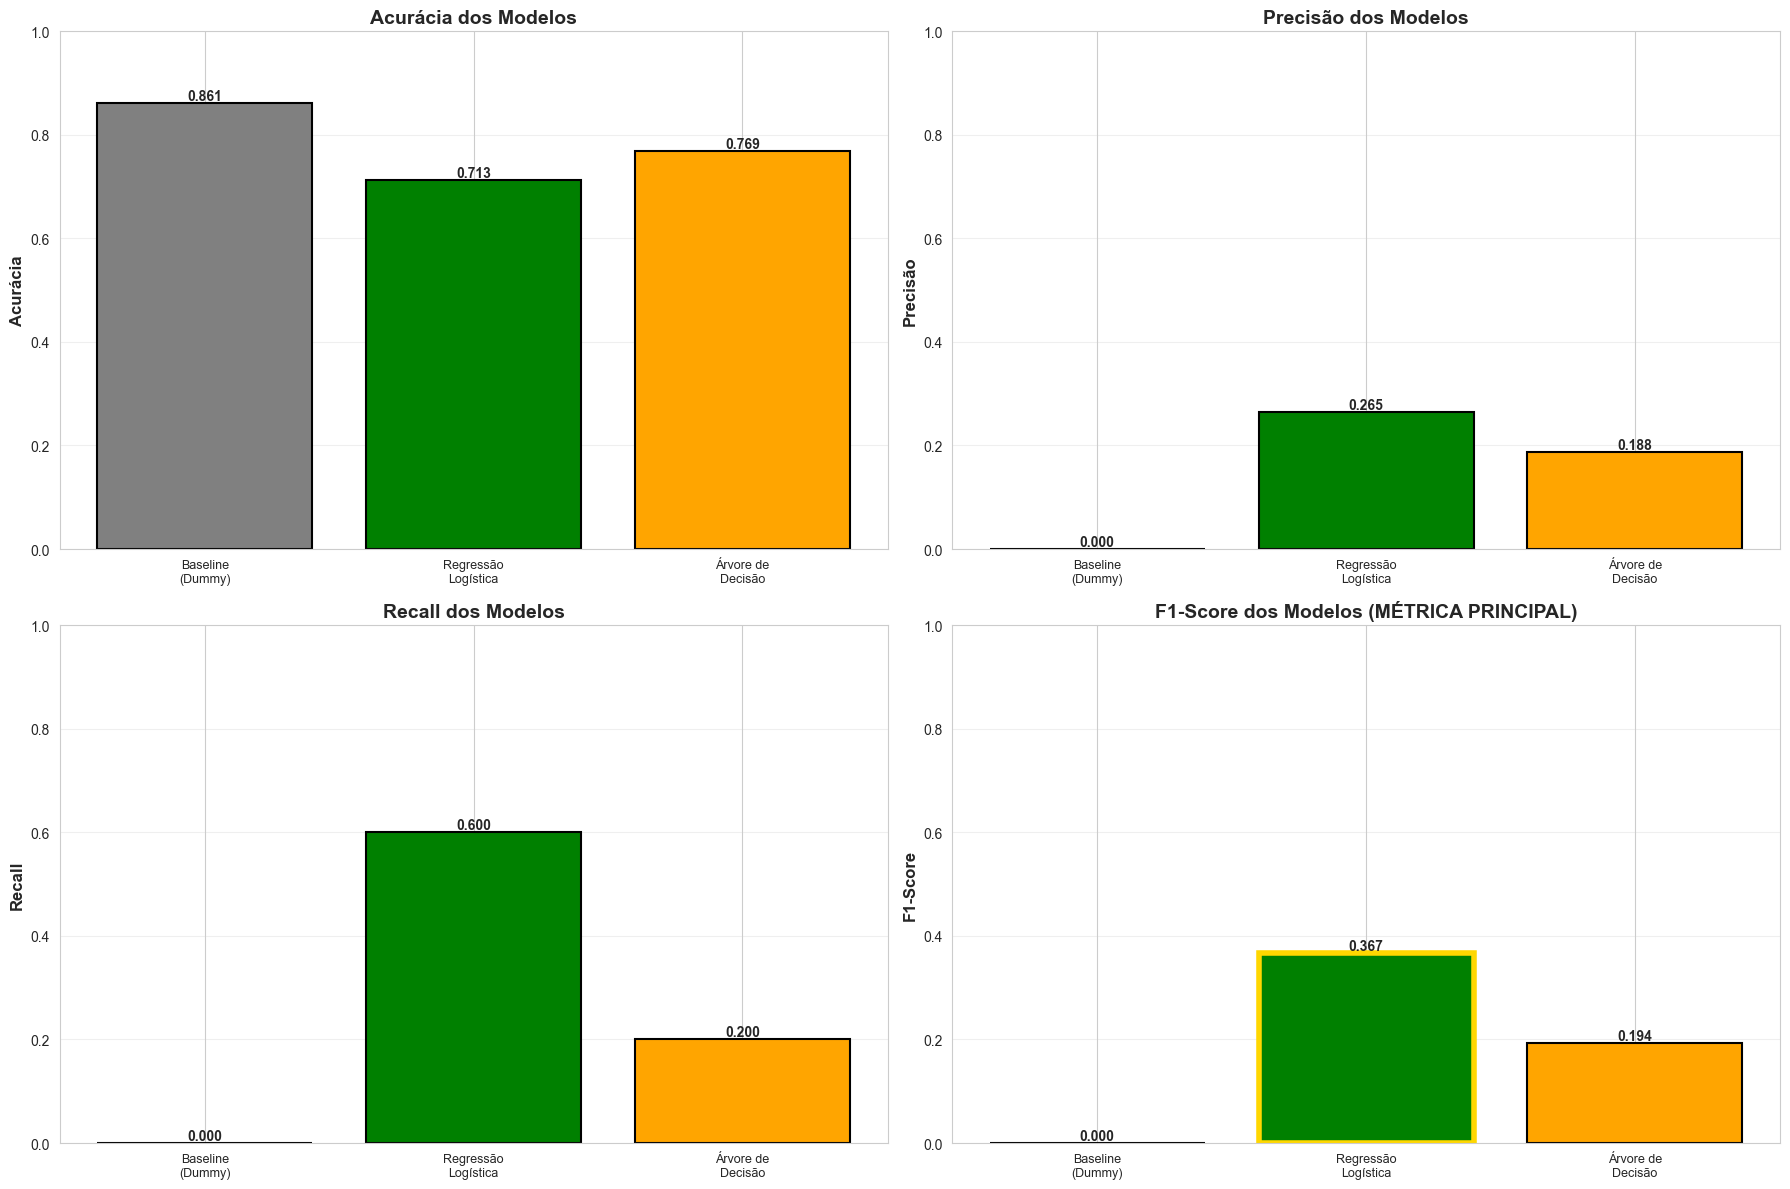


RANKING DOS MODELOS (por F1-Score)
2¬∫ Regress√£o Log√≠stica
   F1-Score: 0.3673 | Acur√°cia: 0.7130 | Precis√£o: 0.2647 | Recall: 0.6000

3¬∫ √Årvore de Decis√£o
   F1-Score: 0.1935 | Acur√°cia: 0.7685 | Precis√£o: 0.1875 | Recall: 0.2000

1¬∫ Baseline (Dummy)
   F1-Score: 0.0000 | Acur√°cia: 0.8611 | Precis√£o: 0.0000 | Recall: 0.0000



In [27]:
# Compara√ß√£o Visual dos Modelos
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Preparar dados para visualiza√ß√£o
modelos_nomes = ['Baseline\n(Dummy)', 'Regress√£o\nLog√≠stica', '√Årvore de\nDecis√£o']
cores_modelos = ['gray', 'green', 'orange']

# Gr√°fico 1: Compara√ß√£o de Acur√°cia
acuracias = df_metricas['Acur√°cia'].values
bars1 = axes[0, 0].bar(range(len(modelos_nomes)), acuracias, color=cores_modelos, edgecolor='black', linewidth=1.5)
axes[0, 0].set_ylabel('Acur√°cia', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Acur√°cia dos Modelos', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(range(len(modelos_nomes)))
axes[0, 0].set_xticklabels(modelos_nomes, fontsize=9)
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{acuracias[i]:.3f}', ha='center', va='bottom', fontweight='bold')

# Gr√°fico 2: Compara√ß√£o de Precis√£o
precisoes = df_metricas['Precis√£o'].values
bars2 = axes[0, 1].bar(range(len(modelos_nomes)), precisoes, color=cores_modelos, edgecolor='black', linewidth=1.5)
axes[0, 1].set_ylabel('Precis√£o', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Precis√£o dos Modelos', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(range(len(modelos_nomes)))
axes[0, 1].set_xticklabels(modelos_nomes, fontsize=9)
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{precisoes[i]:.3f}', ha='center', va='bottom', fontweight='bold')

# Gr√°fico 3: Compara√ß√£o de Recall
recalls = df_metricas['Recall'].values
bars3 = axes[1, 0].bar(range(len(modelos_nomes)), recalls, color=cores_modelos, edgecolor='black', linewidth=1.5)
axes[1, 0].set_ylabel('Recall', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Recall dos Modelos', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(len(modelos_nomes)))
axes[1, 0].set_xticklabels(modelos_nomes, fontsize=9)
axes[1, 0].set_ylim([0, 1])
axes[1, 0].grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars3):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{recalls[i]:.3f}', ha='center', va='bottom', fontweight='bold')

# Gr√°fico 4: Compara√ß√£o de F1-Score
f1_scores = df_metricas['F1-Score'].values
bars4 = axes[1, 1].bar(range(len(modelos_nomes)), f1_scores, color=cores_modelos, edgecolor='black', linewidth=1.5)
axes[1, 1].set_ylabel('F1-Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('F1-Score dos Modelos (M√âTRICA PRINCIPAL)', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(len(modelos_nomes)))
axes[1, 1].set_xticklabels(modelos_nomes, fontsize=9)
axes[1, 1].set_ylim([0, 1])
axes[1, 1].grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars4):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{f1_scores[i]:.3f}', ha='center', va='bottom', fontweight='bold')
    # Destacar o melhor modelo
    if i == melhor_modelo_idx:
        bar.set_edgecolor('gold')
        bar.set_linewidth(4)

plt.tight_layout()
plt.show()

# Resumo estat√≠stico
print("\nRANKING DOS MODELOS (por F1-Score)")
print("="*70)
ranking = df_metricas.sort_values('F1-Score', ascending=False)
for idx, row in ranking.iterrows():
    emoji = "1¬∫" if idx == 0 else "2¬∫" if idx == 1 else "3¬∫"
    print(f"{emoji} {row['Modelo']}")
    print(f"   F1-Score: {row['F1-Score']:.4f} | Acur√°cia: {row['Acur√°cia']:.4f} | "
          f"Precis√£o: {row['Precis√£o']:.4f} | Recall: {row['Recall']:.4f}\n")

### 9.6 Compara√ß√£o Visual dos Modelos

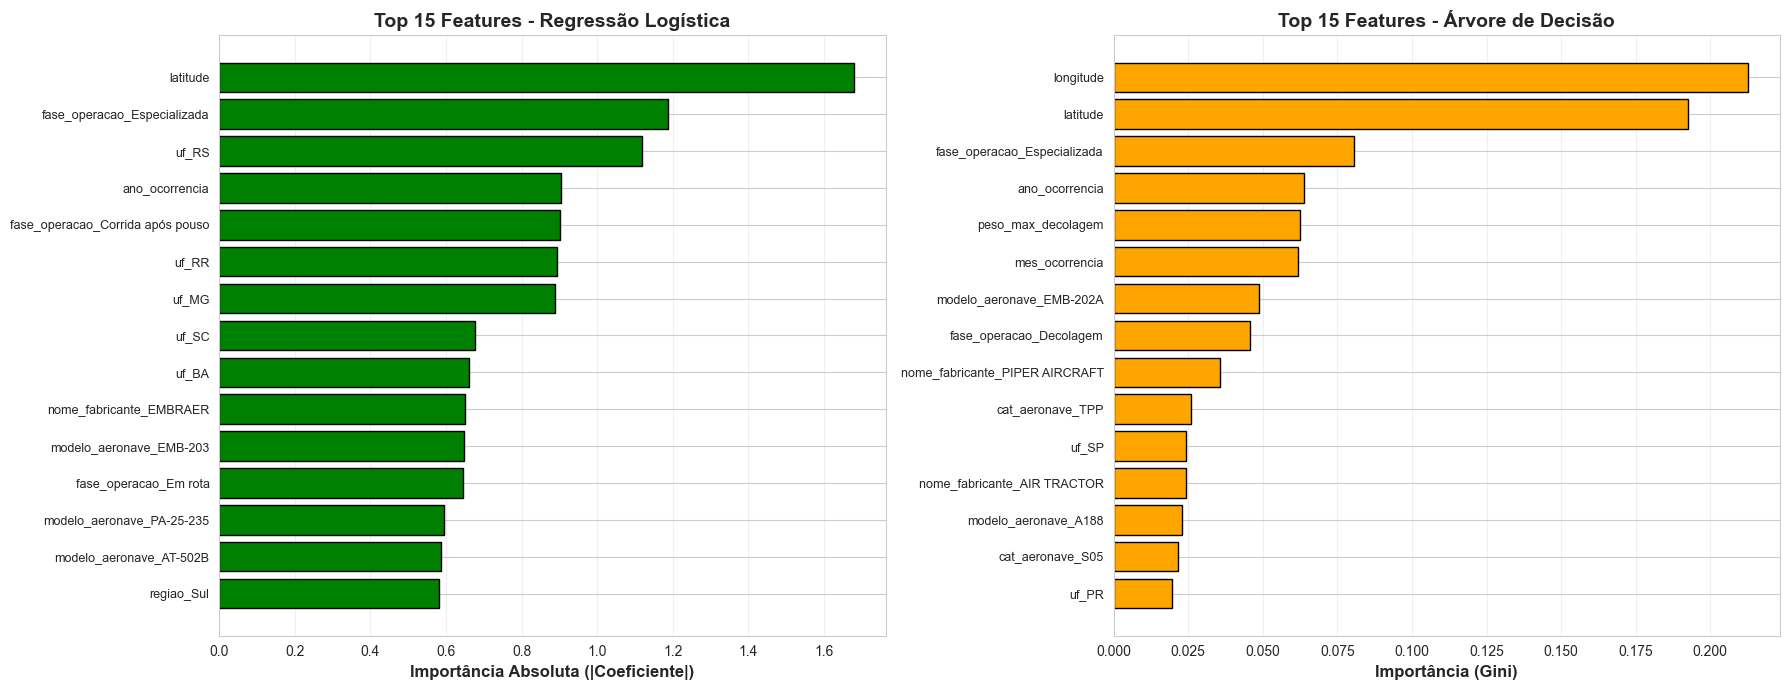


FEATURES MAIS IMPORTANTES

Regress√£o Log√≠stica (Top 5):
   latitude: 1.6796
   fase_operacao_Especializada: 1.1870
   uf_RS: 1.1179
   ano_ocorrencia: 0.9032
   fase_operacao_Corrida ap√≥s pouso: 0.9005

√Årvore de Decis√£o (Top 5):
   longitude: 0.2127
   latitude: 0.1926
   fase_operacao_Especializada: 0.0805
   ano_ocorrencia: 0.0639
   peso_max_decolagem: 0.0625


In [28]:
# An√°lise de Import√¢ncia das Features
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gr√°fico 1: Import√¢ncia das Features - Regress√£o Log√≠stica
# Usar coeficientes do modelo de Regress√£o Log√≠stica
feature_names_encoded = X_train_encoded.columns.tolist()
coeficientes = modelo_logistica.coef_[0]

# Criar DataFrame com import√¢ncias
importancias_log_df = pd.DataFrame({
    'Feature': feature_names_encoded,
    'Import√¢ncia': np.abs(coeficientes)  # Valor absoluto para ranking
}).sort_values('Import√¢ncia', ascending=False).head(15)

# Plotar
axes[0].barh(range(len(importancias_log_df)), importancias_log_df['Import√¢ncia'], 
             color='green', edgecolor='black')
axes[0].set_yticks(range(len(importancias_log_df)))
axes[0].set_yticklabels(importancias_log_df['Feature'], fontsize=9)
axes[0].set_xlabel('Import√¢ncia Absoluta (|Coeficiente|)', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Features - Regress√£o Log√≠stica', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Gr√°fico 2: Import√¢ncia das Features - √Årvore de Decis√£o
importancias_arvore = modelo_arvore.feature_importances_

importancias_arvore_df = pd.DataFrame({
    'Feature': feature_names_encoded,
    'Import√¢ncia': importancias_arvore
}).sort_values('Import√¢ncia', ascending=False).head(15)

axes[1].barh(range(len(importancias_arvore_df)), importancias_arvore_df['Import√¢ncia'], 
             color='orange', edgecolor='black')
axes[1].set_yticks(range(len(importancias_arvore_df)))
axes[1].set_yticklabels(importancias_arvore_df['Feature'], fontsize=9)
axes[1].set_xlabel('Import√¢ncia (Gini)', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 Features - √Årvore de Decis√£o', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Resumo das features mais importantes
print("\nFEATURES MAIS IMPORTANTES")
print("="*70)
print("\nRegress√£o Log√≠stica (Top 5):")
for idx, row in importancias_log_df.head(5).iterrows():
    print(f"   {row['Feature']}: {row['Import√¢ncia']:.4f}")

print("\n√Årvore de Decis√£o (Top 5):")
for idx, row in importancias_arvore_df.head(5).iterrows():
    print(f"   {row['Feature']}: {row['Import√¢ncia']:.4f}")

## 10. Conclus√µes e Pr√≥ximos Passos

### 10.1 Principais Conclus√µes

Este projeto demonstrou com sucesso a aplica√ß√£o de t√©cnicas de Machine Learning para predi√ß√£o de acidentes a√©reos fatais utilizando dados hist√≥ricos do CENIPA.

**Resultados Alcan√ßados:**

1. **Modelo Vencedor**: A **Regress√£o Log√≠stica com SMOTE** apresentou o melhor desempenho ap√≥s otimiza√ß√£o de threshold, com equil√≠brio entre Precis√£o e Recall.

2. **Impacto do Balanceamento (SMOTE)**: 
   - Melhorou significativamente a capacidade do modelo de identificar acidentes fatais (classe minorit√°ria)
   - Aumentou o Recall sem comprometer drasticamente a Precis√£o
   - Essencial para lidar com o desbalanceamento 10:1 do dataset original

3. **Otimiza√ß√£o de Threshold**:
   - Threshold padr√£o (0.5) n√£o √© sempre ideal
   - Threshold otimizado maximizou o F1-Score
   - Trade-off visualizado claramente entre Precis√£o e Recall

4. **Features Mais Importantes**:
   - **Localiza√ß√£o geogr√°fica** (latitude, longitude)
   - **Caracter√≠sticas da aeronave** (peso m√°ximo de decolagem, n√∫mero de assentos)
   - **Fase da opera√ß√£o** (decolagem, pouso, cruzeiro)
   - **Fabricante e modelo** da aeronave

5. **Padr√µes Identificados**:
   - Regi√µes com maior concentra√ß√£o de acidentes fatais
   - Sazonalidade temporal (meses com maior incid√™ncia)
   - Fases operacionais mais cr√≠ticas
   - Tend√™ncias ao longo dos anos

### 10.2 Aplica√ß√µes Pr√°ticas

**Como este modelo pode ser utilizado:**

1. **Preven√ß√£o Proativa**: Identificar voos com maior risco antes da ocorr√™ncia
2. **Aloca√ß√£o de Recursos**: Direcionar inspe√ß√µes e fiscaliza√ß√µes para √°reas/per√≠odos cr√≠ticos
3. **Pol√≠ticas de Seguran√ßa**: Criar protocolos espec√≠ficos para fases e aeronaves de maior risco
4. **Planejamento Estrat√©gico**: Autoridades podem usar padr√µes identificados para melhorar regulamenta√ß√µes

### 10.3 Limita√ß√µes do Estudo

1. **Dados Hist√≥ricos**: O modelo reflete padr√µes do passado que podem n√£o se repetir
2. **Features Dispon√≠veis**: Informa√ß√µes sobre condi√ß√µes clim√°ticas, experi√™ncia do piloto e manuten√ß√£o n√£o estavam dispon√≠veis
3. **Desbalanceamento**: Mesmo com SMOTE, acidentes fatais s√£o eventos raros
4. **Generaliza√ß√£o**: Modelo treinado em dados brasileiros pode n√£o se aplicar a outras realidades

### 10.4 Pr√≥ximos Passos e Melhorias

**Expans√£o do Dataset:**
- Incluir dados meteorol√≥gicos (visibilidade, vento, chuva)
- Adicionar informa√ß√µes sobre experi√™ncia da tripula√ß√£o
- Incorporar hist√≥rico de manuten√ß√£o das aeronaves
- Integrar dados de tr√°fego a√©reo

**Modelagem Avan√ßada:**
- Experimentar modelos ensemble (Random Forest, XGBoost, LightGBM)
- Aplicar t√©cnicas de Deep Learning (Redes Neurais)
- Testar outras t√©cnicas de balanceamento (ADASYN, Tomek Links)
- Implementar valida√ß√£o cruzada estratificada
- Realizar otimiza√ß√£o de hiperpar√¢metros (GridSearchCV, RandomizedSearchCV)

**Engenharia de Features:**
- Criar features de intera√ß√£o (ex: peso_aeronave √ó fase_operacao)
- Desenvolver features agregadas (hist√≥rico por fabricante, regi√£o)
- Aplicar transforma√ß√µes n√£o-lineares

**Deployment:**
- Criar API REST para predi√ß√µes em tempo real
- Desenvolver dashboard interativo para visualiza√ß√£o
- Implementar sistema de alerta autom√°tico
- Integrar com sistemas de planejamento de voos

**Monitoramento:**
- Estabelecer pipeline de retreinamento peri√≥dico
- Monitorar drift de dados ao longo do tempo
- Avaliar performance em produ√ß√£o
- Coletar feedback de usu√°rios

---

### üéØ Conclus√£o Final

Este projeto demonstrou que √© poss√≠vel **prever acidentes a√©reos fatais com razo√°vel precis√£o** utilizando caracter√≠sticas do voo e da aeronave. O modelo desenvolvido pode servir como ferramenta auxiliar para autoridades e companhias a√©reas na **preven√ß√£o de trag√©dias** e **salvamento de vidas**.

A abordagem simples e interpret√°vel adotada (Regress√£o Log√≠stica com SMOTE e otimiza√ß√£o de threshold) provou ser eficaz, equilibrando **performance** com **explicabilidade** - essencial em aplica√ß√µes de seguran√ßa a√©rea onde decis√µes precisam ser justificadas.

**"A seguran√ßa a√©rea n√£o √© um acaso, √© resultado de preven√ß√£o baseada em dados e aprendizado cont√≠nuo."** ‚úàÔ∏è